# AUTONOMIO DATA PREPARATION

<img src='http://autonom.io/wp-content/uploads/2017/08/autonomio_logo.png' align='left'>

30th of August, 2017

<a href='https://github.com/autonomio/core-module/blob/dev/notebooks/autonomio_data_preparation.ipynb'>DOWNLOAD THIS NOTEBOOK</a>

## Using the Data Wrangling Functionality

In [42]:
from autonomio.commands import wrangler, data

# loading the Titanic Kaggle challenge train data from disc
train_csv = data('train.csv','file')

In [43]:
# the original data
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As we can see, the original data is not exactly messy, but it's pretty poor organised. Also there are some nans to be consider. Most importantly the 'Cabin" and 'Age' variables which we both want to use in training our model. 

In [44]:
train_csv.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Imputing NaN Values

Sometimes you just want to impute missing nan values, which you can do very easily with Autonomio. In the case of the Titanic dataset, we definitely want to impute Age (as opposed to just filling it with an arbitrary number, or dropping the rows). 

In [26]:
from autonomio.transform.nan_imputer import nan_imputer

# impute the missing values from Age ('mean_by_std')
train_csv.Age = nan_imputer(train_csv.Age)

By default the nan_imputer uses 'mean_by_std' method which is takes the mean value of the column, and the standard deviation, and then randomly picks a random number in the range of mean +/- standard deviation for each NaN separately. The options are:

- mean_by_std (default setting)
- mean
- median
- mode
- common (highest frequency value)

## Automatic Data Transformation

In most cases, such as it is with the Titanic dataset, you want to do a lot more than just impute NaN values of a single column. In Autonomio this can be done using a single line command wrangler(). Let's see first the use scenario where no parameter are used: 

### Original Dataset

In [47]:
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Transformed Dataset

In [8]:
from autonomio.commands import wrangler

wrangler(train_csv).head()

2 out of 891 rows dropped
4 out of 12 columns dropped


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,1,1,0,7.2500,2
1,2,1,1,0,1,0,71.2833,0
2,3,1,3,0,0,0,7.9250,2
3,4,1,1,0,1,0,53.1000,2
4,5,0,3,1,0,0,8.0500,2


This is less than ideal given how much we lose valuable signal. To avoid this, wrangler() accepts several parameters: 

- max_categories > maximum number of unique items accepted for categorization
- starts_with_col > a column that is categorized based on first character of a string
- treshold > % of NaN values when the whole col is dropped
- first_fill_colls > columns that should be filled before NaN dropping
- fill_with > the value to use for automatic NaN filling
- to_string > for retaining a single column as name/labels
- vectorize > for vectrozing unstructured data

Based on this parameters, data is transformed **AUTOMAGICALLY!** With the wrangler command it's possible to perform elaborate data transformations from a single command including, unstructured data to category labels, nan filling, text vectorization and reordering of columns. In the below example we do all of this in one command. 

In [30]:
train_df = wrangler(train_csv,'Survived',starts_with_col='Cabin',first_fill_cols='Cabin',vectorize='Name')

2 out of 891 rows dropped
2 out of 12 columns dropped


In [31]:
train_df.head()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,...,v1_291,v1_292,v1_293,v1_294,v1_295,v1_296,v1_297,v1_298,v1_299,v1_300
0,0,1,3,1,22.0,1,0,7.2500,0,2,...,0.076229,0.102022,-0.136999,0.144223,-0.108168,0.002261,-0.179145,-0.126971,-0.103262,0.043100
1,1,2,1,0,38.0,1,0,71.2833,1,0,...,0.010419,0.044355,-0.088507,0.055953,-0.100233,0.068065,-0.123556,-0.117946,-0.042136,0.024935
2,1,3,3,0,26.0,0,0,7.9250,0,2,...,0.030466,0.061298,-0.139648,0.125514,-0.134610,0.076679,-0.147858,-0.133381,-0.076613,0.027410
3,1,4,1,0,35.0,1,0,53.1000,1,2,...,-0.024464,0.049996,-0.114802,0.084300,-0.136683,0.095534,-0.117984,-0.168159,-0.014148,0.002345
4,0,5,3,1,35.0,0,0,8.0500,0,2,...,0.028714,0.054949,-0.143989,0.118541,-0.123591,0.060143,-0.133392,-0.116007,-0.083645,0.027228


Let's unpack what happened: 

- Independent variable is first column
- Name was vectorized with word2vec
- Ticket was dropped
- Embarked was converted to categorical 
- Cabin was converted to categorical based on first letter

All of that happened in **ONE COMMAND!** 

## Training a Model with the Transformed Data

,batch_size,dropout,epochs,features,ind_var,layers,max_neurons,n=,network_scale,shape,y_transform
0,10,0.3,200,98,Survived,3,117,889,62407800,funnel,none


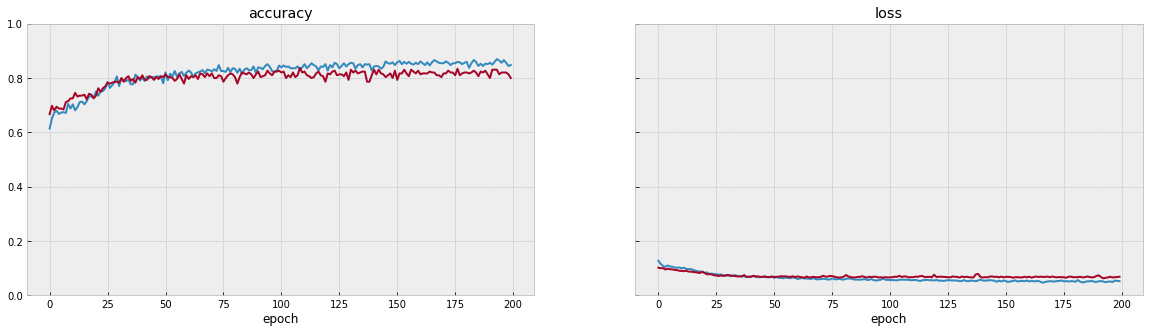

In [46]:
from autonomio.commands import train

%matplotlib inline

train([2,100], 'Survived', train_df, flatten='none', dropout=.3, epoch=200, loss='logcosh')

It is as easy as that. Go ahead and try Autonomio with your own dataset next! :)

## Install Autonomio

<code> pip install git+https://github.com/autonomio/core-module.git@dev </code>

<img src='https://img09.deviantart.net/0248/i/2013/295/d/8/that_s_all_folks__by_surrimugge-d6rfav1.png'>

<a href='http://autonom.io'>Autonomio Website</a>

<a href='https://github.com/autonomio/core-module'>On Github</a>

<img src='http://autonom.io/wp-content/uploads/2017/08/autonomio_logo.png' align='left'>